# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
})

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Linear fit

Consideriamo la funzione lineare:
$$
f(x)=2x+1
$$

In [8]:
N_train = [500, 1000, 1500]
N_epochs = [10, 30, 50, 100]
sigma = [0.05, 0.1, 0.2, 0.25]

Definiamo le seguenti funzioni:
- __initialize_traing__ : genera le coppie di dati input che hanno un certo errore $(\sigma)$ rispetto al comportamento ideale della retta
- __initialize_validation__ : gerera le coppie di dati per la valdazione del modello
- __neurons__ : inizializza il modello con con certo numero $(n_{neurons})$ di neuroni
- __history__ : gli diamo in input le coppie di training $(x_{train}, y_{train})$ da cui l'ottimizzatore troverà i pesi migliori per minimizzare la funzione costo (_Mean Square Error_).


In [9]:
def training_validation(n_train, n_layer, n_epoch, sigma, a, b, c, d):
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n_train)
    sigma = 0.1 # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(d + c* x_train +b * x_train**2 + a * x_train**3, sigma) # actual measures from which we want to guess regression parameters
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = d + c* x_valid +b * x_valid**2 + a * x_valid**3  # ideal (target) linear function

    y_valid = np.random.normal(d + c* x_valid +b * x_valid**2 + a * x_valid**3, sigma)
    model = tf.keras.Sequential()
    if(n_layer > 1):
        model.add(Dense(4, input_shape=(1,), activation='relu'))
        model.add(Dense(16, input_shape=(1,), activation='relu'))
        model.add(Dense(16, input_shape=(1,), activation='relu'))
        model.add(Dense(4, input_shape=(1,), activation='relu'))
    model.add(Dense(1, input_shape=(1,)))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    # get a summary of our composed model
    model.summary()
    model.get_weights()
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=n_epoch,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    return x_valid, y_target, model, history.history['loss'], history.history['val_loss']


In questo caso abbiamo solo due parametri da trovare $(m,b)$ quindi ci basta un solo neurone.

Guardando i pesi possiamo vedere se il modello è stato allenanto bene: $w_1$ rappresenta il coefficiente angolare della retta e $b$ l'intercetta. Quindi in questo caso ci aspettiamo: $w_1=2$ e $b=1$

/home/catezac/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_149 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0943 - mse: 1.0943 - val_loss: 1.1939 - val_mse: 1.1939
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8381 - mse: 0.8381 - val_loss: 0.9643 - val_mse: 0.9643
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7798 - mse: 0.7798 - val_loss: 0.8151 - val_mse: 0.8151
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5114 - mse: 0.5114 - val_loss: 0.7127 - val_mse: 0.7127
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5502 - mse: 0.5502 - val_loss: 0.5931 - val_mse: 0.5931
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.5571 - val_mse: 0.5571
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5319 - mse: 0.5319 - val_loss: 0.5264 - val_mse: 0.5264
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4675 - mse:

Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9790 - mse: 0.9790 - val_loss: 1.1017 - val_mse: 1.1017
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9714 - mse: 0.9714 - val_loss: 0.8926 - val_mse: 0.8926
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6370 - mse: 0.6370 - val_loss: 0.7546 - val_mse: 0.7546
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7271 - mse: 0.7271 - val_loss: 0.6687 - val_mse: 0.6687
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5622 - mse: 0.5622 - val_loss: 0.6055 - val_mse: 0.6055
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5090 - mse: 0.5090 - val_loss: 0.5613 - val_mse: 0.5613
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5639 - mse: 0.5639 - val_loss: 0.5287 - val_mse: 0.5287
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5080 - mse: 0.5080 - val_loss: 0.5045 - val_mse: 0.5045
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4401 - mse:

KeyboardInterrupt: 

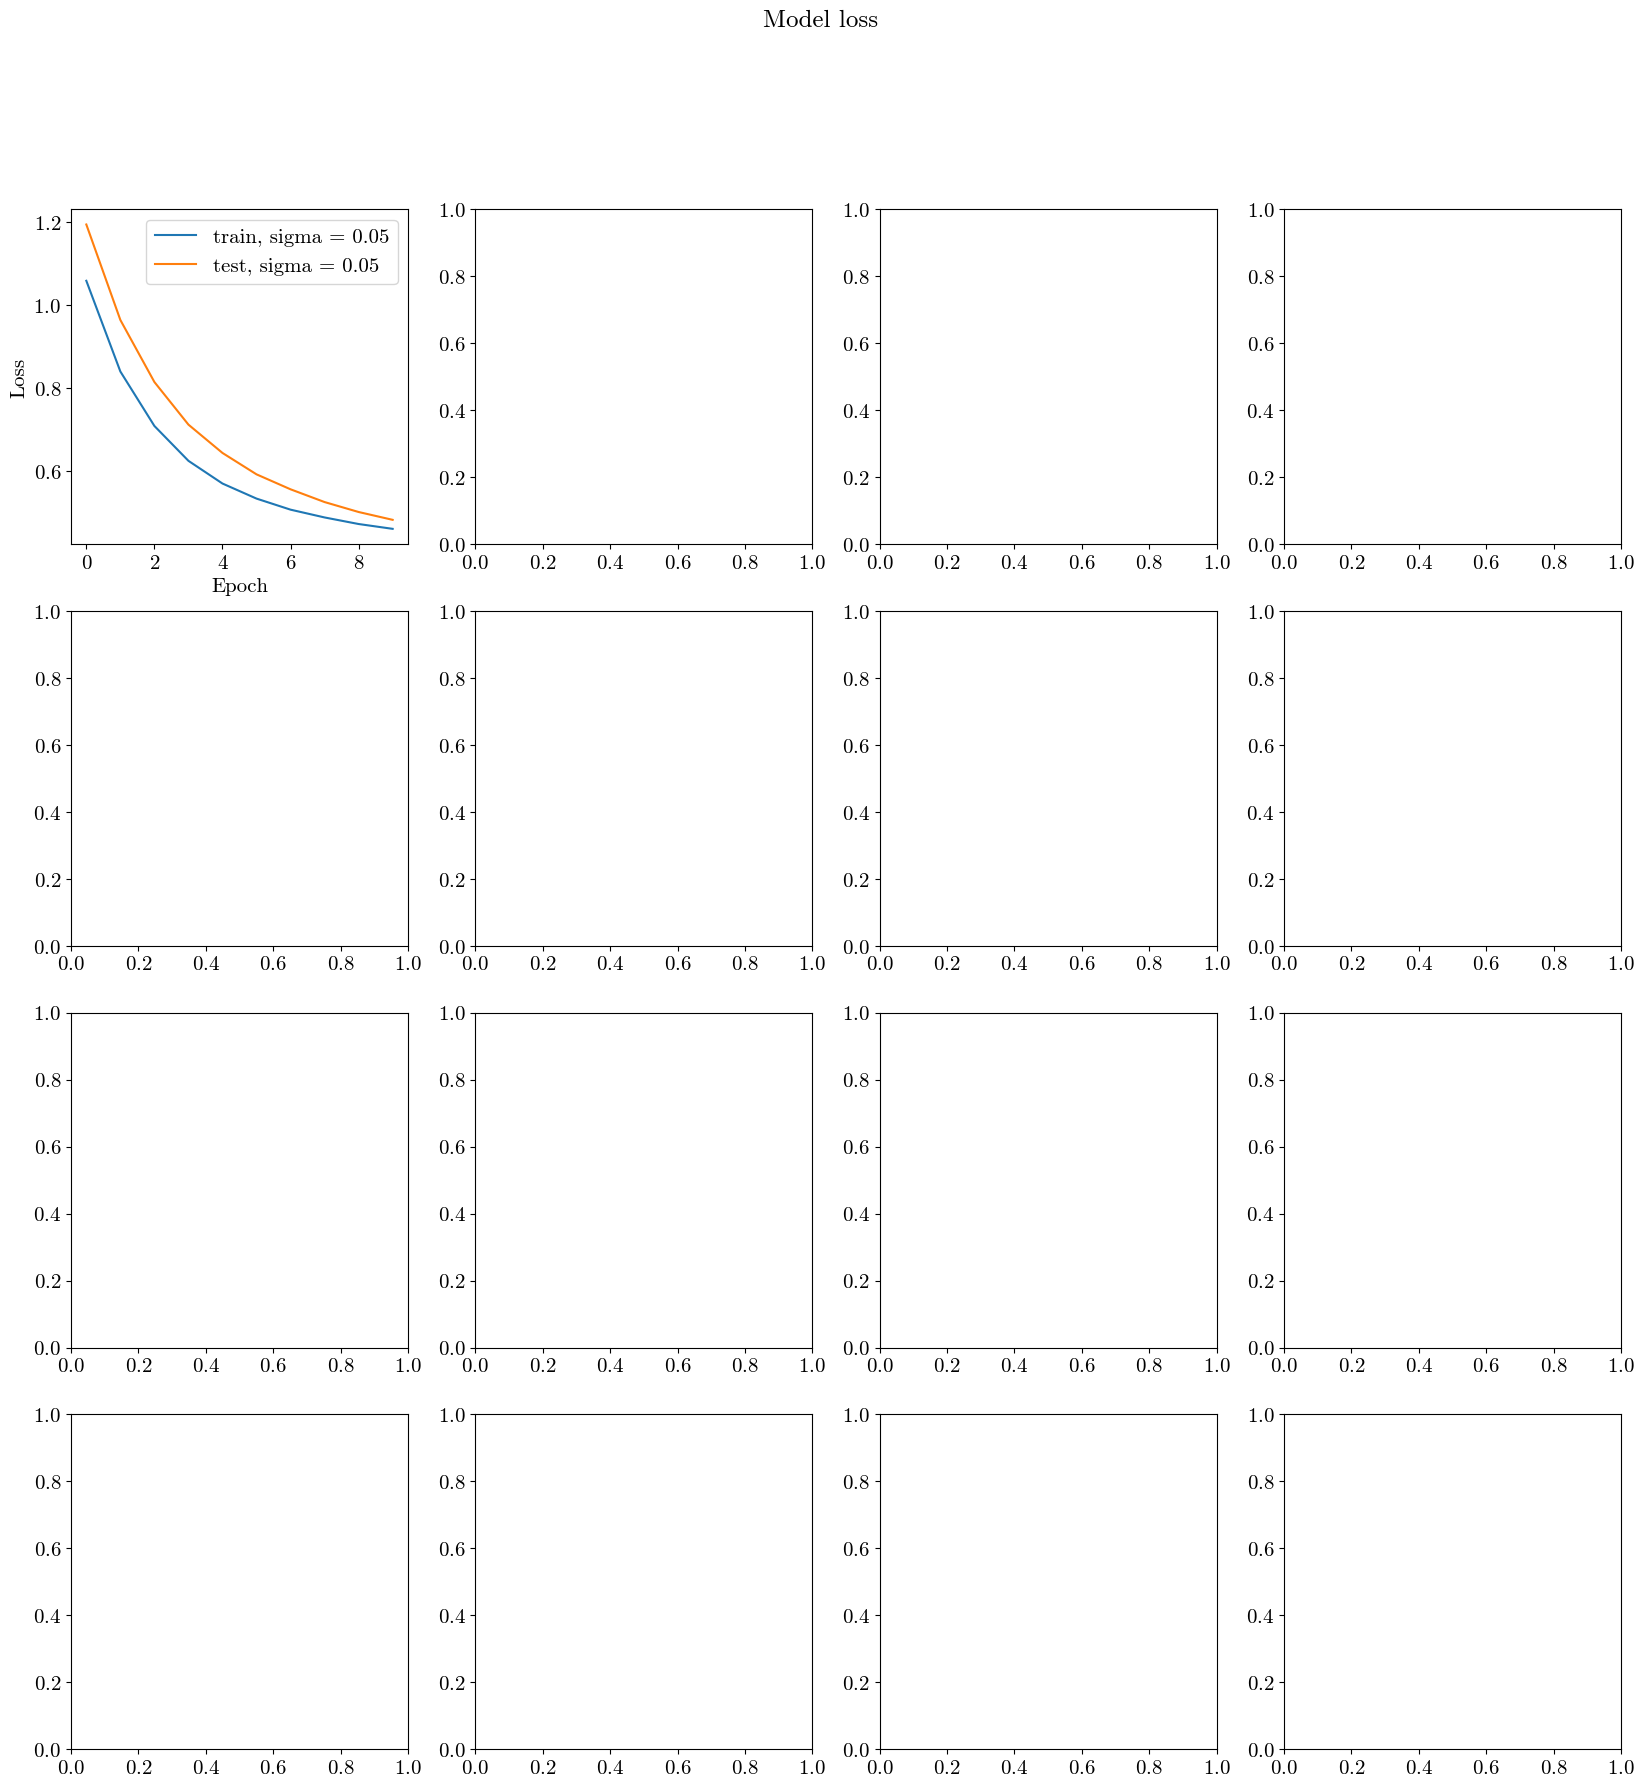

In [ ]:
# look into training history
# Plot training & validation loss values
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Model loss')
for i in range (4): #ciclo su vari valori di n_epochs
    for j in range(4): #ciclo su vari valori di sigma
        x_valid, y_target, model, loss, val_loss = training_validation(500,1,N_epochs[i],sigma[j], 1, 2, 0, 0)
        #plt.subplot(3,3,i+j+1)
        ax = axes[i,j]
        ax.plot(loss, label = f'train, sigma = {sigma[j]}')
        ax.plot(val_loss, label = f'test, sigma = {sigma[j]}')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Epoch')
        ax.legend()
# Aggiungi un titolo centrato sopra ogni riga
for i in range(4):
    # posizionamento orizzontale (metà figura) e verticale dipende dall'indice
    y = 0.90 - i * (1/4)  # 1/4 = passo verticale in figura normalizzata
    fig.text(
        0.5, y,
        f'{N_epochs[i]} epoche',
        ha='center',
        va='center',
        fontsize=16,
        fontweight='bold'
    )

In [87]:
x_valid_best, y_target_best,model_best, loss_best, val_loss_best = training_validation(500,1,100,0.05,1,2,0,0)

/home/catezac/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0791 - mse: 1.0791 - val_loss: 1.2673 - val_mse: 1.2673
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9854 - mse: 0.9854 - val_loss: 1.0228 - val_mse: 1.0228
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7904 - mse: 0.7904 - val_loss: 0.8633 - val_mse: 0.8633
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6464 - mse: 0.6464 - val_loss: 0.7517 - val_mse: 0.7517
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6779 - mse: 0.6779 - val_loss: 0.6757 - val_mse: 0.6757
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6003 - mse: 0.6003 - val_loss: 0.6198 - val_mse: 0.6198
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.5770 - val_mse: 0.5770
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5217 - mse: 0.5217 - val_loss: 0.5443 - val_mse: 0.5443
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


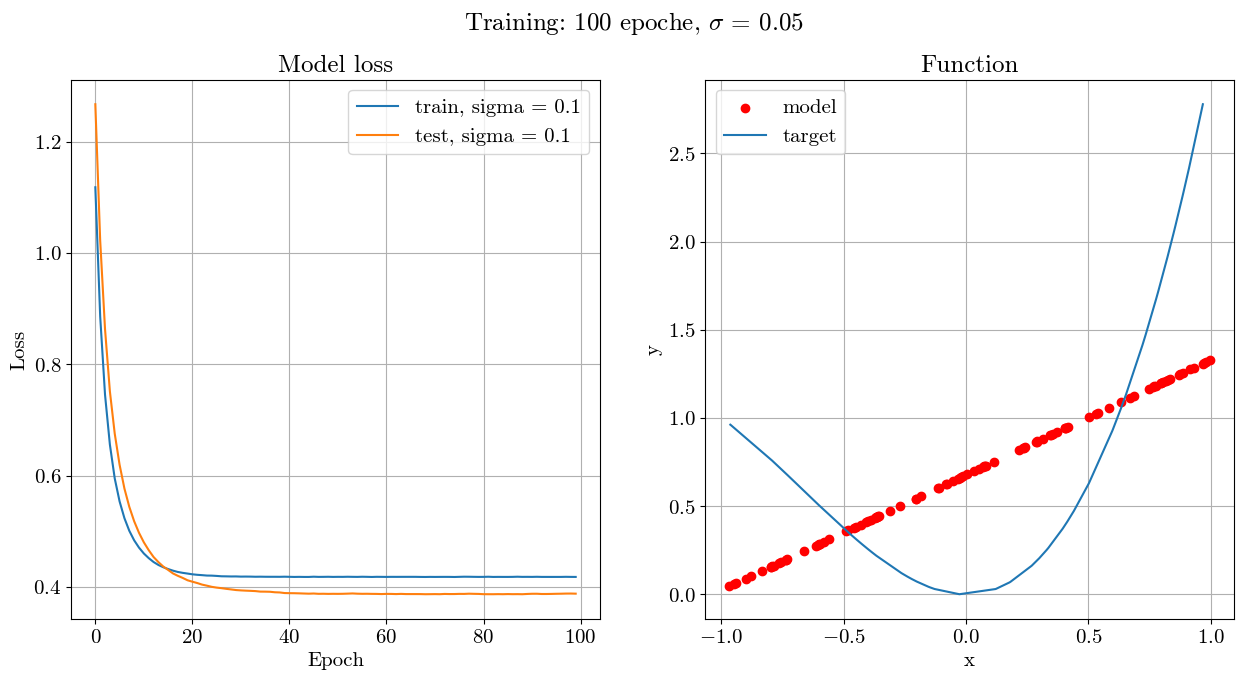

In [89]:

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_best.predict(x_predicted)

fig = plt.figure(1, figsize=(15,7))
fig.suptitle('Training: 100 epoche, $\sigma$ = 0.05')
plt.subplot(1,2,1)
plt.plot(loss_best, label = f'train, sigma = {sigma[j]}')
plt.plot(val_loss_best, label = f'test, sigma = {sigma[j]}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted,color='r', label = 'model')
plt.plot(x_valid_best, y_target_best, label = 'target')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Function')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [10]:
# target parameters of f(x) = ax^3 +b x^2 +c x +d
a = 3 
b = -2
c = - 3
d = 4

In [11]:
import numpy as np
x_valid_pol, y_target_pol, model_pol, loss_pol, val_loss_pol = training_validation(500,4,60,0.1,a,b,c,d)


/home/catezac/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-20 14:17:09.073885: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.5037 - mse: 7.5037 - val_loss: 1.2501 - val_mse: 1.2501
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9269 - mse: 0.9269 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.4977 - val_mse: 0.4977
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4751 - mse: 0.4751 - val_loss: 0.3941 - val_mse: 0.3941
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4012 - mse: 0.4012 - val_loss: 0.3541 - val_mse: 0.3541
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3535 - mse: 0.3535 - val_loss: 0.3563 - val_mse: 0.3563
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3591 - mse: 0.3591 - val_loss: 0.3776 - val_mse: 0.3776
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2999 - mse: 0.2999 - val_loss: 0.3373 - val_mse: 0.3373
Epoch 9/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3309 - mse:

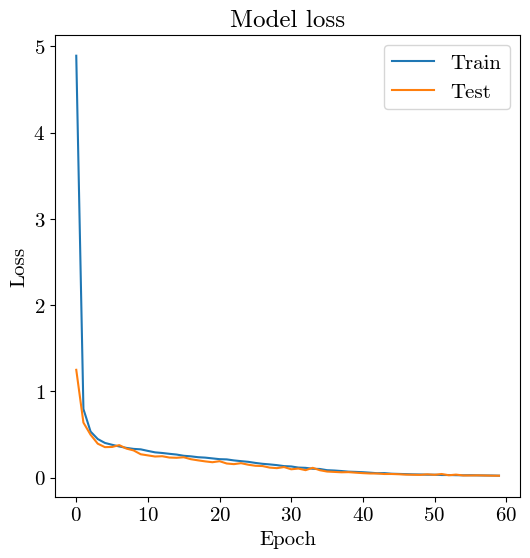

In [13]:
# look into training history
# Plot training & validation loss values
plt.plot(loss_pol)
plt.plot(val_loss_pol)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


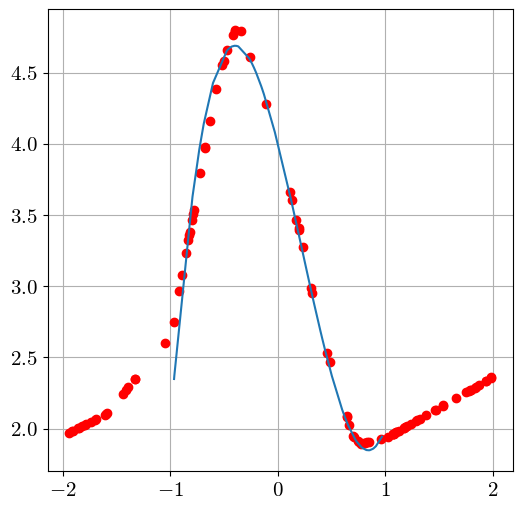

In [14]:
x_predicted_pol = np.random.uniform(-2, 2, 100)
y_predicted_pol = model_pol.predict(x_predicted_pol)
#x_predicted_pol.sort()
plt.scatter(x_predicted_pol, y_predicted_pol,color='r')
plt.plot(x_valid_pol, y_target_pol)

plt.grid(True)
plt.show()

/home/catezac/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_596 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_597 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_598 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_599 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_600 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 10.1506 - mse: 10.1506 - val_loss: 6.2865 - val_mse: 6.2865
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.6425 - mse: 5.6425 - val_loss: 2.9640 - val_mse: 2.9640
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6172 - mse: 2.6172 - val_loss: 1.6289 - val_mse: 1.6289
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3983 - mse: 1.3983 - val_loss: 1.3887 - val_mse: 1.3887
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1439 - mse: 1.1439 - val_loss: 1.2466 - val_mse: 1.2466
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0589 - mse: 1.0589 - val_loss: 1.0817 - val_mse: 1.0817
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8903 - mse: 0.8903 - val_loss: 0.8978 - val_mse: 0.8978
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7222 - mse: 0.7222 - val_loss: 0.6599 - val_mse: 0.6599
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5

Model: "sequential_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_601 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_602 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_603 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_604 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_605 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.4924 - mse: 7.4924 - val_loss: 0.9639 - val_mse: 0.9639
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7560 - mse: 0.7560 - val_loss: 0.6925 - val_mse: 0.6925
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.5341 - val_mse: 0.5341
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5268 - mse: 0.5268 - val_loss: 0.4528 - val_mse: 0.4528
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4819 - mse: 0.4819 - val_loss: 0.3627 - val_mse: 0.3627
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3657 - mse: 0.3657 - val_loss: 0.3238 - val_mse: 0.3238
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2908 - mse: 0.2908 - val_loss: 0.3209 - val_mse: 0.3209
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2740 - mse: 0.2740 - val_loss: 0.2578 - val_mse: 0.2578
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2710 - 

Model: "sequential_190"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_606 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_607 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_608 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_609 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_610 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.8095 - mse: 8.8095 - val_loss: 1.4225 - val_mse: 1.4225
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0140 - mse: 1.0140 - val_loss: 0.7594 - val_mse: 0.7594
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6173 - mse: 0.6173 - val_loss: 0.4915 - val_mse: 0.4915
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4351 - mse: 0.4351 - val_loss: 0.3712 - val_mse: 0.3712
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3964 - mse: 0.3964 - val_loss: 0.3264 - val_mse: 0.3264
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3476 - mse: 0.3476 - val_loss: 0.3496 - val_mse: 0.3496
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2976 - mse: 0.2976 - val_loss: 0.2943 - val_mse: 0.2943
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3495 - mse: 0.3495 - val_loss: 0.3064 - val_mse: 0.3064
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2988 - mse

Model: "sequential_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_611 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_612 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_613 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_614 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_615 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.8873 - mse: 7.8873 - val_loss: 0.8707 - val_mse: 0.8707
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7497 - mse: 0.7497 - val_loss: 0.6040 - val_mse: 0.6040
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.4455 - val_mse: 0.4455
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5012 - mse: 0.5012 - val_loss: 0.3574 - val_mse: 0.3574
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3631 - mse: 0.3631 - val_loss: 0.3170 - val_mse: 0.3170
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3291 - mse: 0.3291 - val_loss: 0.2687 - val_mse: 0.2687
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2668 - mse: 0.2668 - val_loss: 0.2369 - val_mse: 0.2369
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2636 - mse: 0.2636 - val_loss: 0.1873 - val_mse: 0.1873
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1963 - mse:

Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_616 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_617 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_618 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_619 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_620 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.7326 - mse: 9.7326 - val_loss: 3.8226 - val_mse: 3.8226
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3460 - mse: 2.3460 - val_loss: 0.6113 - val_mse: 0.6113
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5216 - mse: 0.5216 - val_loss: 0.4860 - val_mse: 0.4860
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4463 - mse: 0.4463 - val_loss: 0.4232 - val_mse: 0.4232
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.3449 - val_mse: 0.3449
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.3038 - val_mse: 0.3038
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3453 - mse: 0.3453 - val_loss: 0.2788 - val_mse: 0.2788
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2856 - mse: 0.2856 - val_loss: 0.2829 - val_mse: 0.2829
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2917 - mse:

Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_621 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_622 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_623 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_624 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_625 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.3886 - mse: 7.3886 - val_loss: 0.7627 - val_mse: 0.7627
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7320 - mse: 0.7320 - val_loss: 0.6195 - val_mse: 0.6195
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6189 - mse: 0.6189 - val_loss: 0.5064 - val_mse: 0.5064
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5125 - mse: 0.5125 - val_loss: 0.4329 - val_mse: 0.4329
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4185 - mse: 0.4185 - val_loss: 0.3797 - val_mse: 0.3797
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.3207 - val_mse: 0.3207
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3731 - mse: 0.3731 - val_loss: 0.2886 - val_mse: 0.2886
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3240 - mse: 0.3240 - val_loss: 0.2501 - val_mse: 0.2501
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3013 - mse:

Model: "sequential_194"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_626 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_627 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_628 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_629 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_630 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.3173 - mse: 9.3173 - val_loss: 1.2247 - val_mse: 1.2247
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8850 - mse: 0.8850 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.5536 - val_mse: 0.5536
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5053 - mse: 0.5053 - val_loss: 0.5861 - val_mse: 0.5861
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.4512 - val_mse: 0.4512
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4990 - mse: 0.4990 - val_loss: 0.4159 - val_mse: 0.4159
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4314 - mse: 0.4314 - val_loss: 0.4214 - val_mse: 0.4214
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4010 - mse: 0.4010 - val_loss: 0.3497 - val_mse: 0.3497
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4053 - mse:

Model: "sequential_195"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_631 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_632 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_633 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_634 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_635 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 5.5972 - mse: 5.5972 - val_loss: 1.0818 - val_mse: 1.0818
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8325 - mse: 0.8325 - val_loss: 0.6458 - val_mse: 0.6458
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5242 - mse: 0.5242 - val_loss: 0.4181 - val_mse: 0.4181
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3627 - mse: 0.3627 - val_loss: 0.3022 - val_mse: 0.3022
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2758 - mse: 0.2758 - val_loss: 0.2810 - val_mse: 0.2810
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2908 - mse: 0.2908 - val_loss: 0.2437 - val_mse: 0.2437
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2420 - mse: 0.2420 - val_loss: 0.2444 - val_mse: 0.2444
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2669 - mse: 0.2669 - val_loss: 0.2373 - val_mse: 0.2373
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2186 - mse:

Model: "sequential_196"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_636 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_637 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_638 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_639 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_640 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.9729 - mse: 8.9729 - val_loss: 1.7291 - val_mse: 1.7291
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2292 - mse: 1.2292 - val_loss: 0.8402 - val_mse: 0.8402
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6933 - mse: 0.6933 - val_loss: 0.6154 - val_mse: 0.6154
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4801 - mse: 0.4801 - val_loss: 0.4970 - val_mse: 0.4970
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4616 - mse: 0.4616 - val_loss: 0.4330 - val_mse: 0.4330
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4117 - mse: 0.4117 - val_loss: 0.3928 - val_mse: 0.3928
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4090 - mse: 0.4090 - val_loss: 0.3731 - val_mse: 0.3731
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3405 - mse: 0.3405 - val_loss: 0.3335 - val_mse: 0.3335
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3426 - mse:

Model: "sequential_197"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_641 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_642 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_643 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_644 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_645 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.8188 - mse: 9.8188 - val_loss: 3.4000 - val_mse: 3.4000
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2624 - mse: 2.2624 - val_loss: 0.6062 - val_mse: 0.6062
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5389 - mse: 0.5389 - val_loss: 0.4585 - val_mse: 0.4585
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3836 - mse: 0.3836 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3897 - mse: 0.3897 - val_loss: 0.3328 - val_mse: 0.3328
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3447 - mse: 0.3447 - val_loss: 0.3129 - val_mse: 0.3129
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3676 - mse: 0.3676 - val_loss: 0.2894 - val_mse: 0.2894
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3177 - mse: 0.3177 - val_loss: 0.2988 - val_mse: 0.2988
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3084 - mse:

Model: "sequential_198"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_646 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_647 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_648 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_649 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_650 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10.8678 - mse: 10.8678 - val_loss: 6.5229 - val_mse: 6.5229
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8387 - mse: 5.8387 - val_loss: 3.6441 - val_mse: 3.6441
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1535 - mse: 3.1535 - val_loss: 2.0073 - val_mse: 2.0073
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7918 - mse: 1.7918 - val_loss: 1.3099 - val_mse: 1.3099
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1329 - mse: 1.1329 - val_loss: 1.1309 - val_mse: 1.1309
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9724 - mse: 0.9724 - val_loss: 1.0804 - val_mse: 1.0804
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8911 - mse: 0.8911 - val_loss: 1.0404 - val_mse: 1.0404
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8907 - mse: 0.8907 - val_loss: 0.9894 - val_mse: 0.9894
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8117 - 

Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_651 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_652 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_653 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_654 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_655 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.2669 - mse: 7.2669 - val_loss: 1.5717 - val_mse: 1.5717
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1784 - mse: 1.1784 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6220 - mse: 0.6220 - val_loss: 0.5027 - val_mse: 0.5027
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4315 - mse: 0.4315 - val_loss: 0.3656 - val_mse: 0.3656
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3686 - mse: 0.3686 - val_loss: 0.3553 - val_mse: 0.3553
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3235 - mse: 0.3235 - val_loss: 0.3185 - val_mse: 0.3185
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3611 - mse: 0.3611 - val_loss: 0.2970 - val_mse: 0.2970
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3326 - mse: 0.3326 - val_loss: 0.2866 - val_mse: 0.2866
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4299 - mse:

Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_656 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_657 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_658 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_659 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_660 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.8960 - mse: 7.8960 - val_loss: 1.0139 - val_mse: 1.0139
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8315 - mse: 0.8315 - val_loss: 0.6621 - val_mse: 0.6621
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.4494 - val_mse: 0.4494
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4301 - mse: 0.4301 - val_loss: 0.3550 - val_mse: 0.3550
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.2859 - val_mse: 0.2859
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2932 - mse: 0.2932 - val_loss: 0.2516 - val_mse: 0.2516
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2790 - mse: 0.2790 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2635 - mse: 0.2635 - val_loss: 0.2086 - val_mse: 0.2086
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.26

Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_661 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_662 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_663 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_664 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_665 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.8132 - mse: 9.8132 - val_loss: 2.9644 - val_mse: 2.9644
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0265 - mse: 2.0265 - val_loss: 0.9593 - val_mse: 0.9593
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8030 - mse: 0.8030 - val_loss: 0.8437 - val_mse: 0.8437
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6954 - mse: 0.6954 - val_loss: 0.7490 - val_mse: 0.7490
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6482 - mse: 0.6482 - val_loss: 0.6534 - val_mse: 0.6534
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.5752 - val_mse: 0.5752
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5404 - mse: 0.5404 - val_loss: 0.5246 - val_mse: 0.5246
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5204 - mse: 0.5204 - val_loss: 0.4771 - val_mse: 0.4771
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.49

Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_666 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_667 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_668 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_669 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_670 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.8520 - mse: 8.8520 - val_loss: 0.9894 - val_mse: 0.9894
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7581 - mse: 0.7581 - val_loss: 0.6244 - val_mse: 0.6244
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6196 - mse: 0.6196 - val_loss: 0.5649 - val_mse: 0.5649
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5487 - mse: 0.5487 - val_loss: 0.4917 - val_mse: 0.4917
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4886 - mse: 0.4886 - val_loss: 0.4527 - val_mse: 0.4527
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5120 - mse: 0.5120 - val_loss: 0.4219 - val_mse: 0.4219
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4313 - mse: 0.4313 - val_loss: 0.4101 - val_mse: 0.4101
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3665 - mse: 0.3665 - val_loss: 0.4287 - val_mse: 0.4287
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.45

Model: "sequential_203"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_671 (Dense)               │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_672 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_673 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_674 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_675 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.6651 - mse: 8.6651 - val_loss: 0.8503 - val_mse: 0.8503
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6505 - mse: 0.6505 - val_loss: 0.5122 - val_mse: 0.5122
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5111 - mse: 0.5111 - val_loss: 0.4242 - val_mse: 0.4242
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.3931 - val_mse: 0.3931
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3814 - mse: 0.3814 - val_loss: 0.3461 - val_mse: 0.3461
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3771 - mse: 0.3771 - val_loss: 0.3140 - val_mse: 0.3140
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3027 - mse: 0.3027 - val_loss: 0.2679 - val_mse: 0.2679
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3159 - mse: 0.3159 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2

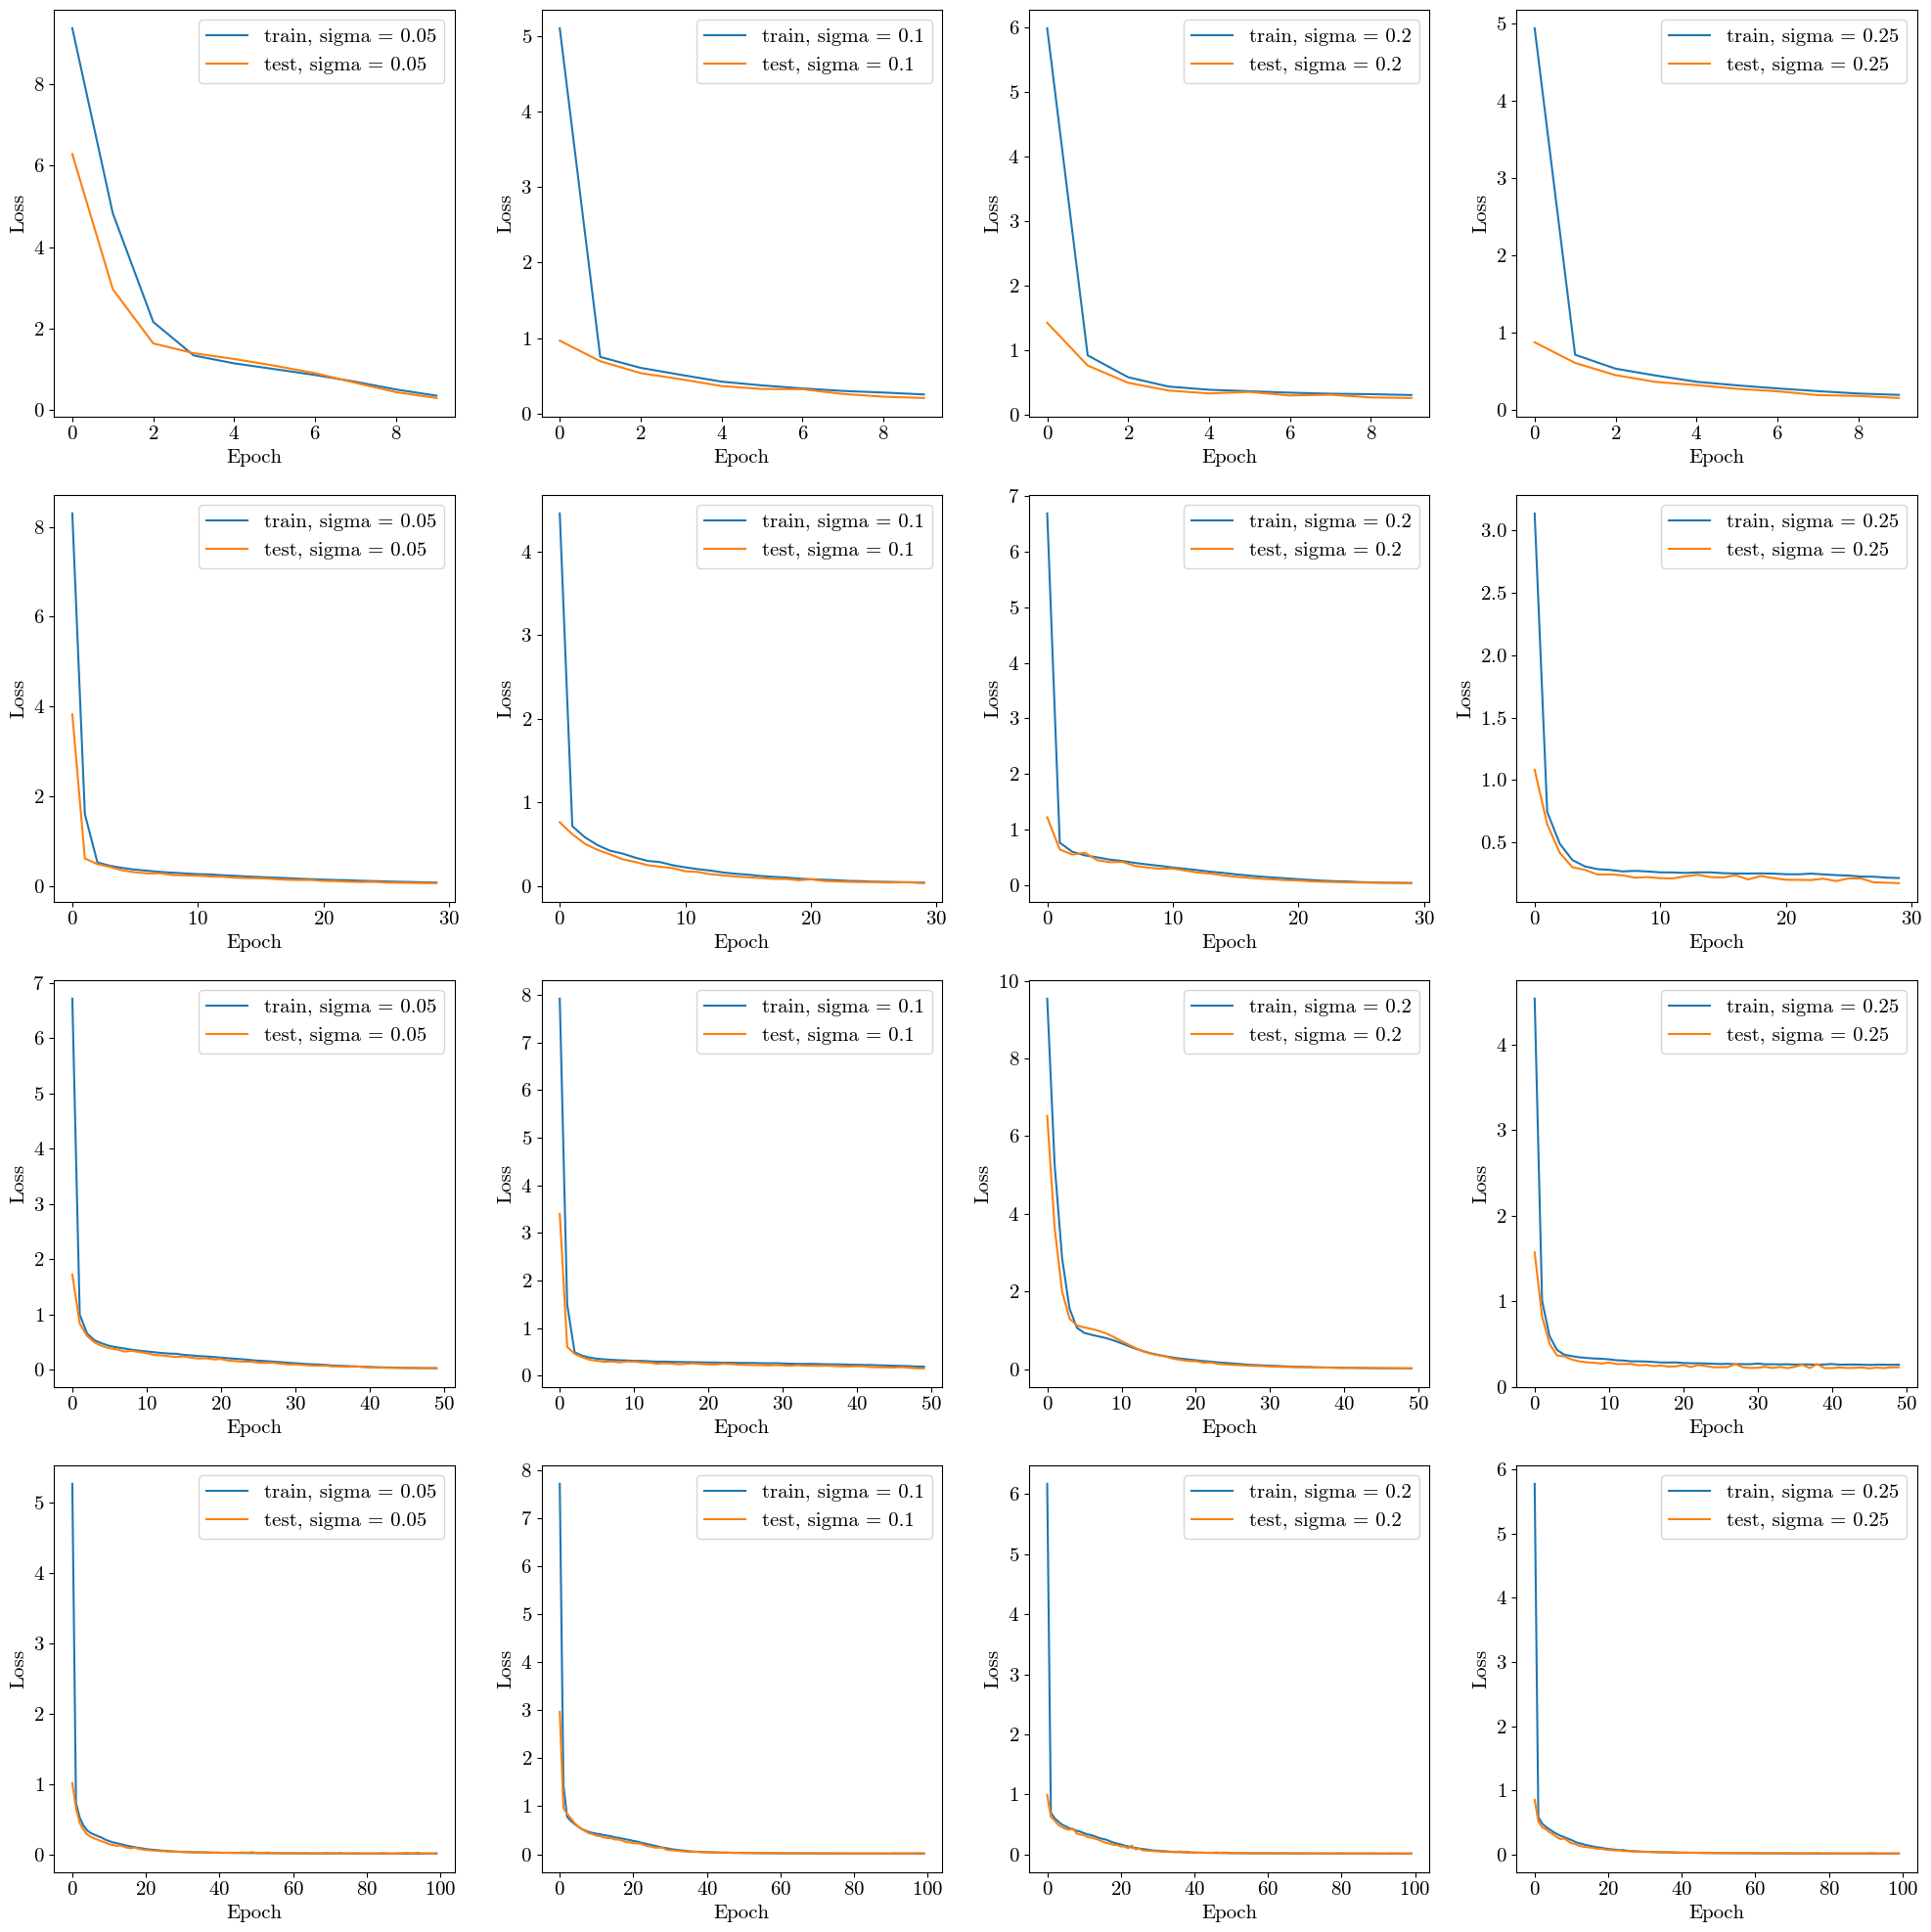

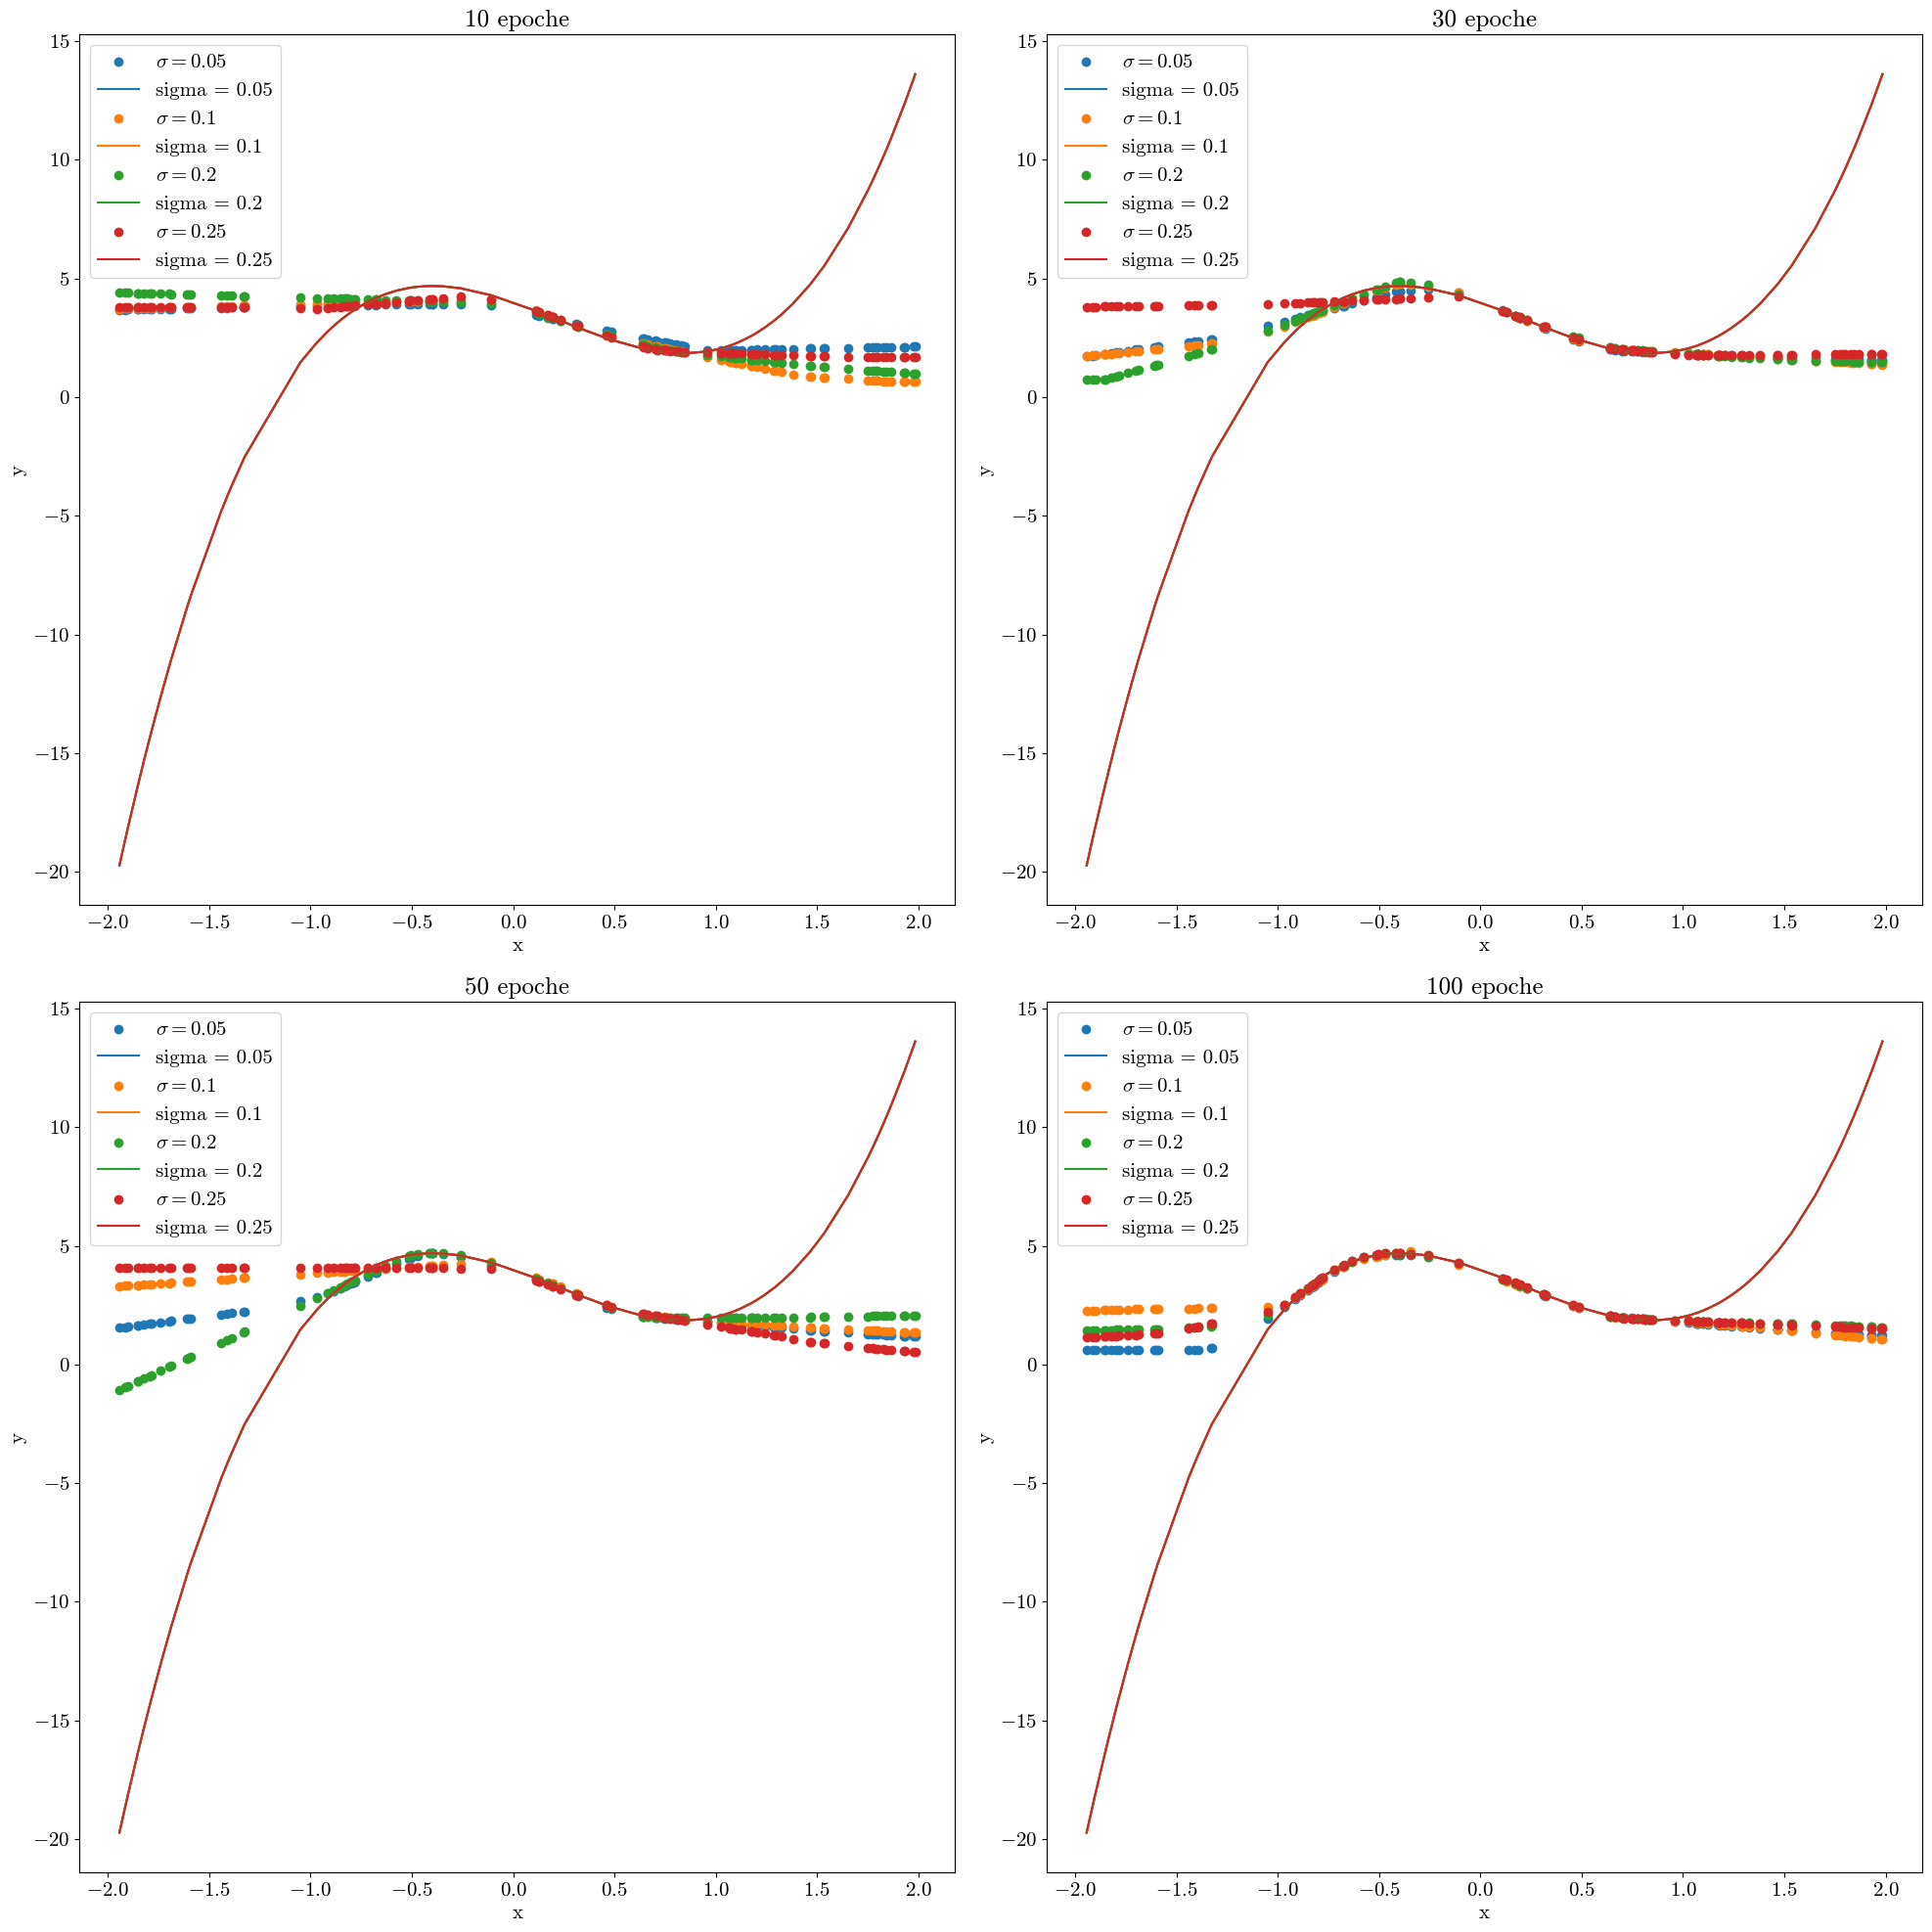

In [33]:
# look into training history
# Plot training & validation loss values
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig2, axes2 = plt.subplots(2, 2, figsize=(20, 20))
x_predicted_pol = np.empty((100,16))
y_predicted_pol = np.empty((100,16))
k = 0
t = 0
for i in range (4): #ciclo su vari valori di n_epochs
    if (i == 1):
        t = 0
        k = 1
    if (i == 2):
        t = 1
        k = 0
    if (i == 3):
        t = 1
        k = 1
    for j in range(4): #ciclo su vari valori di sigma
        x_valid_pol, y_target_pol, model_pol, loss_pol, val_loss_pol = training_validation(500,4,N_epochs[i],sigma[j], a,b,c,d)
        ax = axes[i,j]
        ax2 = axes2[t,k]
        ax.plot(loss_pol, label = f'train, sigma = {sigma[j]}')
        ax.plot(val_loss_pol, label = f'test, sigma = {sigma[j]}')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Epoch')
        ax.legend()
        fig.tight_layout()
        
        x_predicted_pol[:,k] = np.random.uniform(-2, 2, 100)
        y_pred = model_pol.predict(x_predicted_pol[:,k])
        y_predicted_pol[:,k] = y_pred.ravel()
        ax2.scatter(x_predicted_pol[:,k], y_predicted_pol[:,k], label= f'$\sigma = {sigma[j]}$')
        x_predicted_pol[:,k].sort()
        ax2.plot(x_predicted_pol[:,k], d + c* x_predicted_pol[:,k] +b * x_predicted_pol[:,k]**2 + a * x_predicted_pol[:,k]**3, label = f'sigma = {sigma[j]}')
        ax2.set_ylabel('y')
        ax2.set_xlabel('x')
        ax2.set_title(f'{N_epochs[i]} epoche')
        ax2.legend()
        fig2.tight_layout()
    


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [ ]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train_3 = np.random.uniform(-3/2, 3/2, 150)
y_train_3 = np.random.uniform(-3/2, 3/2, 150)
x_valid_3 = np.random.uniform(-3/2, 3/2, 50)
y_valid_3 = np.random.uniform(-3/2, 3/2, 50)
x_valid_3.sort()
y_valid_3.sort()

X_valid_3, Y_valid_3 = np.meshgrid(x_valid_3, y_valid_3)
X_train_3, Y_train_3 = np.meshgrid(x_train_3, y_train_3)

print(X_valid_3.shape)
print(Y_valid_3.shape)

z_target_3 = np.sin(X_valid_3**2+Y_valid_3**2)  # ideal (target)  function

sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train_3 = np.random.normal(np.sin(X_train_3**2+Y_train_3**2) , sigma) # actual measures from which we want to guess regression parameters
z_valid_3 = np.random.normal(np.sin(X_valid_3**2+Y_valid_3**2) , sigma)
print(z_valid_3.shape)

(50, 50)
(50, 50)
(50, 50)


/tmp/ipykernel_33609/1450241792.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 600x600 with 0 Axes>

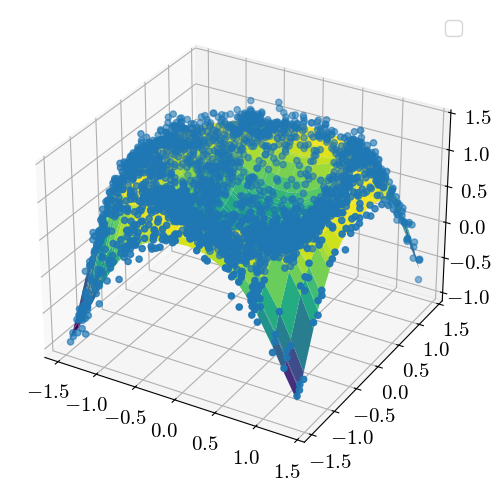

In [100]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_valid_3, Y_valid_3, z_valid_3)
ax.plot_surface(X_valid_3, Y_valid_3, np.sin(X_valid_3**2 + Y_valid_3**2), cmap='viridis')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model_sin = tf.keras.Sequential()
model_sin.add(Dense(4, input_shape=(2,), activation='relu'))
model_sin.add(Dense(16, activation='relu'))
model_sin.add(Dense(16, activation='relu'))
model_sin.add(Dense(4, activation='relu'))
model_sin.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model_sin.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [102]:
# get a summary of our composed model
model_sin.summary()

Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437 (1.71 KB)

 Trainable params: 437 (1.71 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
#X_tr = np.stack((X_train_3, Y_train_3), axis = 1 ) # shape (N, 2)
X_val = np.column_stack((X_valid_3.ravel(), Y_valid_3.ravel()))  # shape (N_valid, 2)
X_train = np.column_stack((X_train_3.ravel(), Y_train_3.ravel())) 

Z_train = z_train_3.ravel()
Z_valid = z_valid_3.ravel()

history = model_sin.fit(x = X_train , y=Z_train,
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(X_val, Z_valid))

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1882 - mse: 0.1882 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1475 - mse: 0.1475 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1308 - mse: 0.1308 - val_loss: 0.1115 - val_mse: 0.1115
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 0.0933 - val_mse: 0.0933
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0721 - mse: 0.0721 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 9/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - lo

KeyboardInterrupt: 

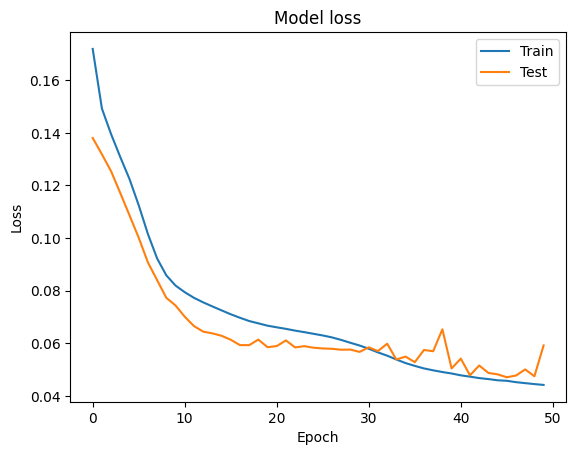

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

  1/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
(10000, 2)
(100, 100)
(100, 100)


/tmp/ipykernel_954/3907518543.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 640x480 with 0 Axes>

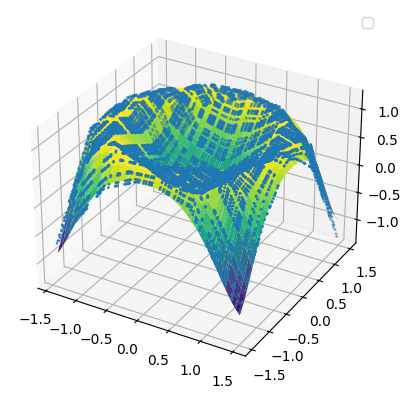

In [ ]:
x_predicted_3 = np.random.uniform(-3/2, 3/2, 100)
y_predicted_3 = np.random.uniform(-3/2,3/2, 100)

x_predicted_3.sort()
y_predicted_3.sort()

X_pred, Y_pred = np.meshgrid(x_predicted_3, y_predicted_3)

X_prediction = np.column_stack((X_pred.ravel(), Y_pred.ravel()))
Z_pred = model_sin.predict(X_prediction).reshape(X_pred.shape)

print(X_prediction.shape)
#print(X_pred)
print(Y_pred.shape)
print(Z_pred.shape)

# plot validation and target dataset
plt.figure()
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X_pred, Y_pred, Z_pred, s=1)
Z = np.sin(X_pred**2+Y_pred**2)
ax1.plot_surface(X_pred, Y_pred, Z, cmap='viridis')
plt.legend()
plt.grid(True)
plt.show()

